# Milan Kovacs
# 21308128
## **Question:** Does age have a correlation on term deposit subscription?

# 1 Preparation of the environment
## 1.1 mporting Python modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We will now load `bank.csv` file into the Notebook

In [2]:
data_frame = pd.read_csv('./bank.csv')

## 1.2 Simple analysis via tables

In [3]:
data_frame.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


We can see a wide variety of attributes:
`age, job, marital stauts, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, subscribed`

Going back to the [source](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#) we can explain what each of these mean: 
| Variable Name	| Role | Type |Demographic | Description | Units | Missing Values |
|:--------------:|:--------------:|:--------------:|------|------|------|-------|
| age	| Feature	| Integer	| Age | | | no |
| job	| Feature	| Categorical	| Occupation	| type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') | | no |
| marital	| Feature	| Categorical	| Marital Status	| marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) | | no | 
| education	| Feature |	Categorical	| Education Level	| (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') | 		| no |
| default | 	Feature| 	Binary| 	 | 	has credit in default? | |		| no | 
| balance | 	Feature| 	Integer| 	 | 	average yearly balance |	euros	| no |
| housing | 	Feature| 	Binary| 	 | 	has housing loan? |		| no |
| loan | 	Feature| 	Binary| 	 | 	has personal loan?	|	| no |
| contact | 	Feature| 	Categorical|  | 		contact communication type (categorical: 'cellular','telephone') |		| yes |
| day_of_week | 	Feature| 	Date| 	 | 	last contact day of the week |		| no |
| month | 	Feature| 	Date| 	 | 	last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') |		| no |
| duration | 	Feature| 	Integer| 	 | 	last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.	| |	no |
| campaign |	Feature |	Integer |	 | 	number of contacts performed during this campaign and for this client (numeric, includes last contact)	|	| no |
| pdays |	Feature |	Integer |		 | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)	|	| yes |
| previous |	Feature |	Integer |	 | 	number of contacts performed before this campaign and for this client	|	| no |
| poutcome |	Feature |	Categorical |	 | 	outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')	|	| yes |
| y |	Target |	Binary |	 | 	has the client subscribed a term deposit?	|	| no |


In [4]:
data_frame.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


From the `tail(10)` function call, we can see the last 10 rows of the provided examples. There are **2,000** observations given. 

We will now try and categorise the data given to us:
| Column Name   |      Data Type |   Ord, or Nom   |  Sample values |
|----------|:--------------:|-------|------:|
| age      |  numerical | ordinal     | 32, 47, 58, null |
| job |    categorical | nominal   | technician, retired, blue-collar, null   |
| marital | categorical | nominal | single, married, divorced    |
| education | categorical | ordinal | tertiary, secondary, primary, null |
| default | categorical | nominal | yes, no |
| balance | numerical | ordinal | 392, 1035, -415 |
| housing | categorical | ordinal | yes, no |
| loan | categorical | nominal | yes, no |
| contact | categorical | ordinal | cellular, telephone, null | 
| day  | numerical | ordinal | 1, 2, 4, 5 |
| month | numerical | ordinal | apr, may, july | 
| duration | numerical | ordinal | 957, 126, 233 |
| campaign | numerical | ordinal | 1 - 11 |
| pdays | numerical | ordinal | -1, 233, 124 |
| previous | numerical | ordinal | 0 - 55 |
| poutcome | categorical | nominal | success, failure, other, null |
| subscribed | categorical | nominal | yes, no |

In [5]:
data_frame.describe() 

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


Looking at the age, we can see there are **12** entries missing, but in the table of the site, it is described to have no missing properties. Do those 12 have a meaning?

The _mean_ is age ~42 with a _Standard Deviation_ of 12.7. The youngest account holder is 18, which makes sense as to have a bank account you have to be over the age of 18, and the most senior account holder is 93.  

**Q1** is 32, **Q2** is 38 and **Q3** is 50. This emphasizes that most of the account holders asked to subscribed is around the ages ~32 -> ~50. We can confirm this via some visual plots.

## 2 Visualization

### 2.1 Heatmap

<Axes: >

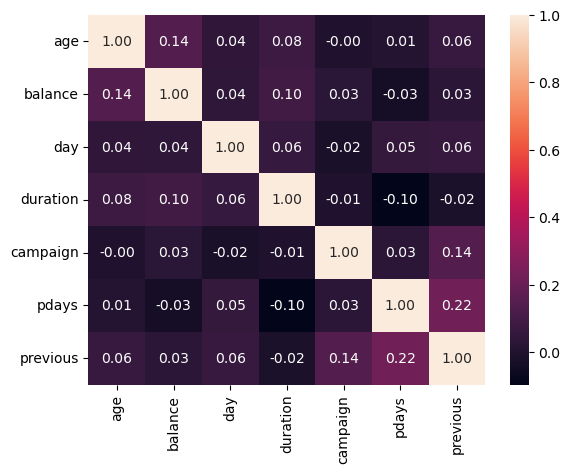

In [6]:
sns.heatmap(data_frame.corr(numeric_only=1), annot=True, fmt='.2f')

There is a weak positive correlation between balance and age. It may be worth considering this for further plotting, but for now let's continue with what we have. 

## 2.2 Pairplot

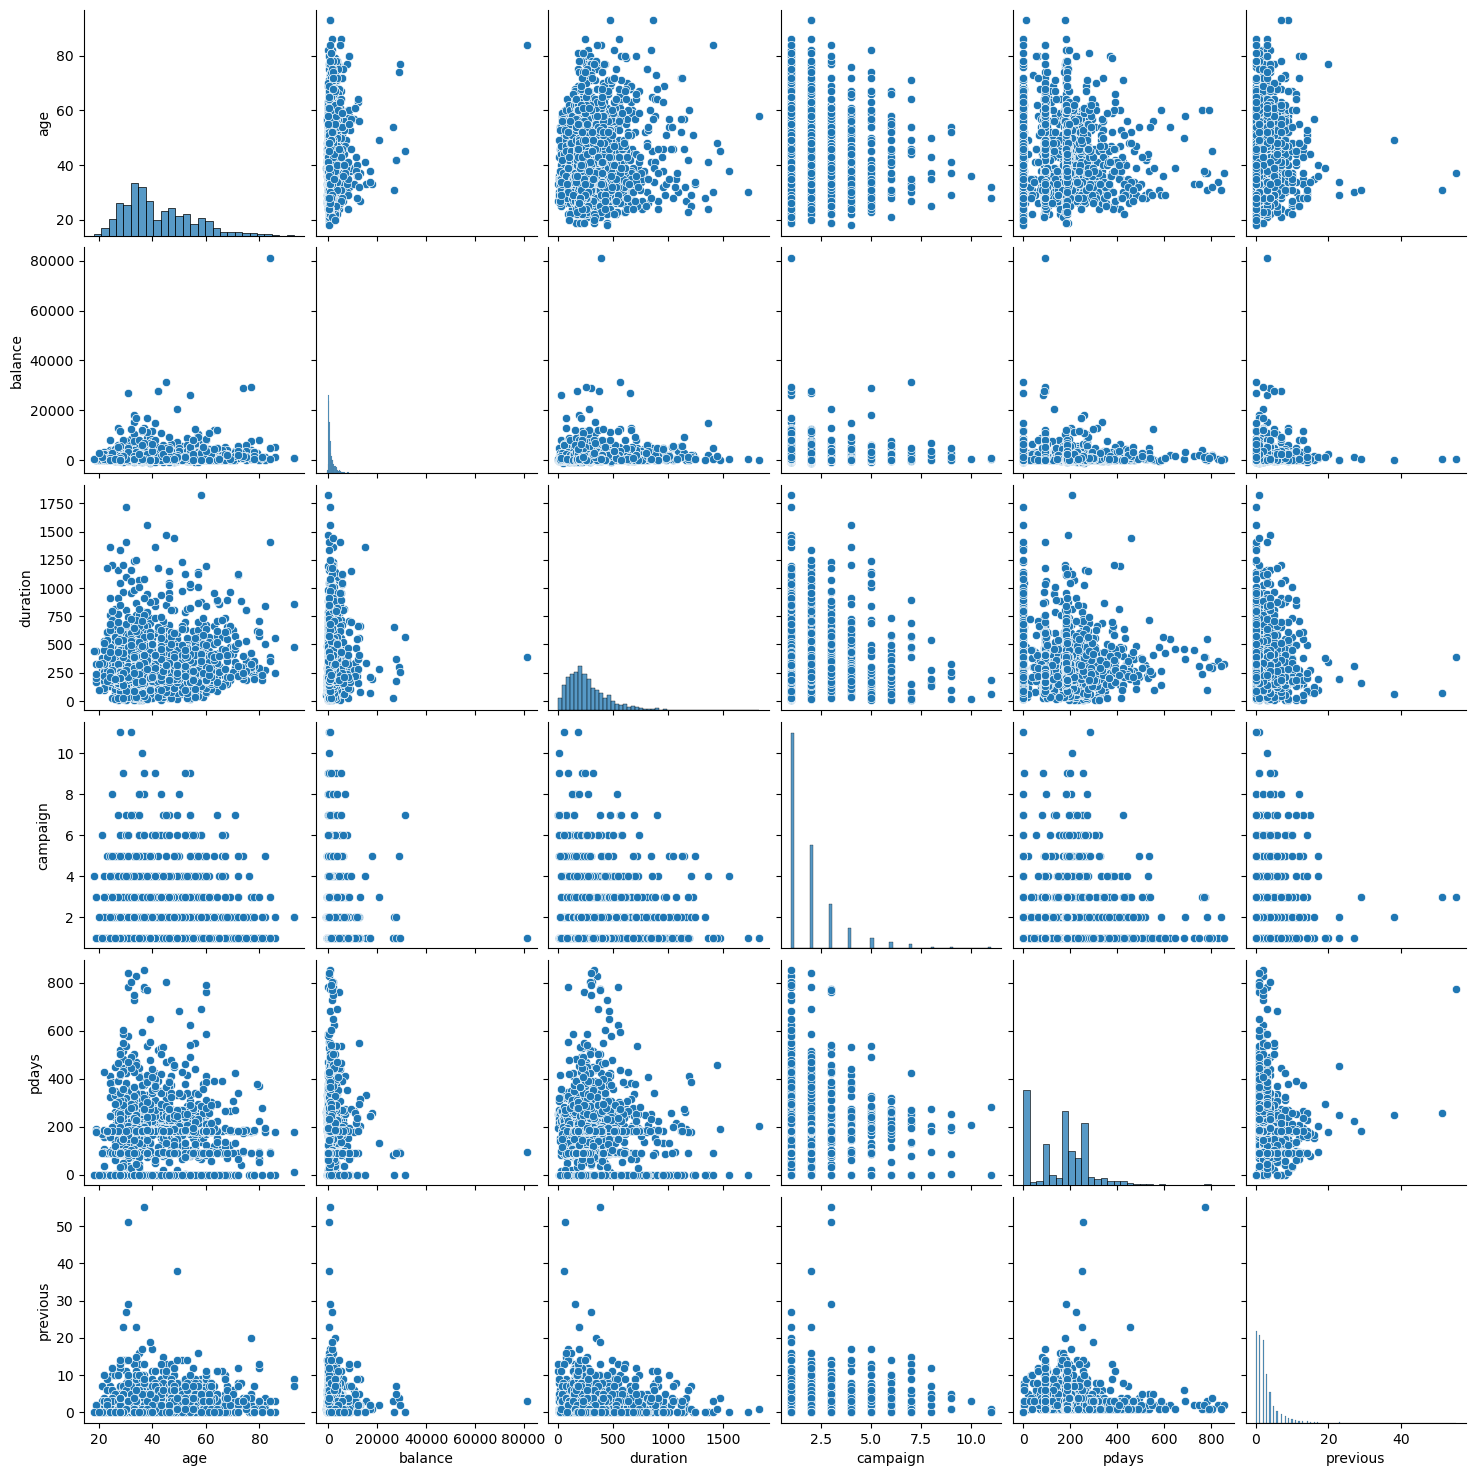

In [7]:
sns.pairplot(data=data_frame[[
    'age',
    'balance',
    'duration',
    'campaign',
    'pdays',
    'previous'
]].dropna())
plt.show()

There is a lot going on in here, disregarding the number of plots. Some interesting observations in relation with age.

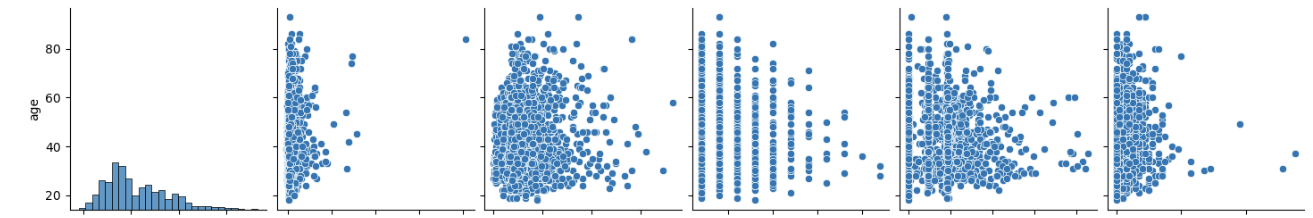

**Age and balance:** There seems to be a tight coupling on the balance on the lower end through all ages, there's a few outliers for all ages.  
**Age and Duration:** There is an distributed cluster, and certain calls lasted longer than others for all ages, so it might be worth exploring that after.  
**Age and number of campaigns:** How many times certain people have been reached out to. We can see that younger account holders are reached out more often.  
**Age and Pdays:** Number of days that passed by after the client was last contacted from a previous campaign. A lot of people got called within a couple of days, and a few extremes for the younger adults.  
**Age and Previous:** Number of contacts performed before this campaign and for this account holder, again, closely clustered to the beginning with a few outliers for the younger account holders.

# 3 Histogram, boxplot, etc.

## 3.1 Plotting correlation between categorical and numerical

In [8]:
data_frame['age'].value_counts()

age
33.0    95
35.0    90
31.0    87
34.0    84
32.0    77
        ..
86.0     2
73.0     2
81.0     2
79.0     1
18.0     1
Name: count, Length: 68, dtype: int64

In [9]:
data_frame['age'].count()

1988

We can see that there are 12 NaN values

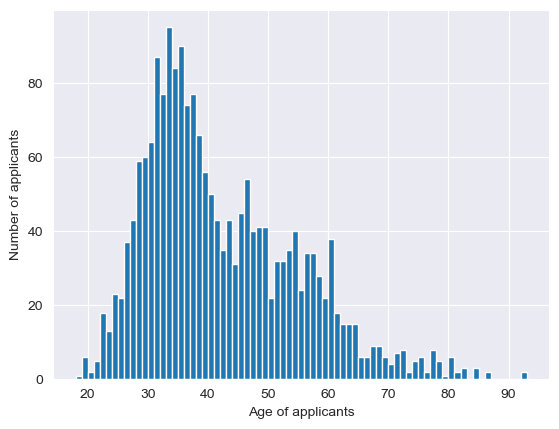

In [27]:
# Let's create two bar plots, for age against declined loans, and age against successful loans

data_frame['age'].hist(bins=(93 - 18))
plt.xlabel('Age of applicants')
plt.ylabel('Number of applicants')
plt.show()

The barchart emphasizes on the previous idea on the closely clustered ages. You can see there is a high density between ~30 to ~41, a lesser dense from ~42 to ~60 and scarce >60.

## 3.2 Subscribed (Target)

In [28]:
data_frame['subscribed'].value_counts()

subscribed
no     1000
yes    1000
Name: count, dtype: int64

In [29]:
data_frame['subscribed'].count()

2000

In the target value, we have an even split of **1,000** for both who subscribed and those who declined

<Axes: >

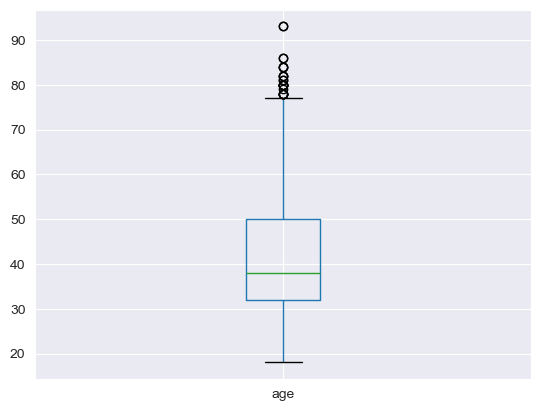

In [30]:
data_frame.boxplot(column='age')

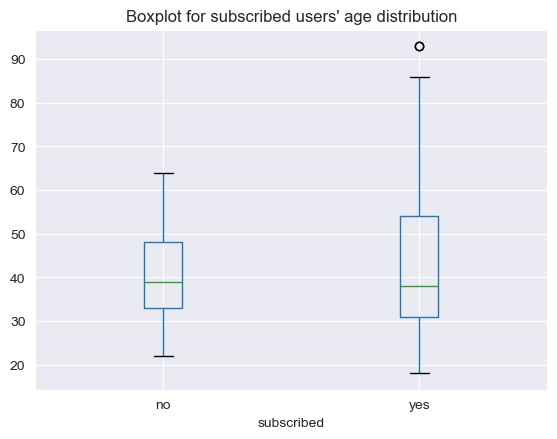

In [34]:
data_frame.boxplot(column='age', by='subscribed')
plt.title('Boxplot for subscribed users\' age distribution')
plt.suptitle("")
plt.show()

There is a wider range of users who subscribed, in contrast to those who declined. A large density of those who declined are between ~33 to ~48.

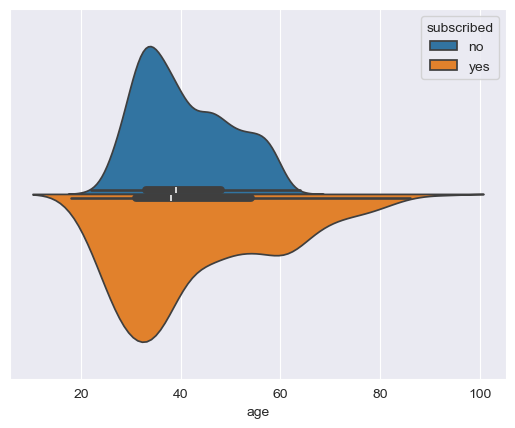

In [44]:
sns.violinplot(data=data_frame, x='age', hue='subscribed', split=True)
plt.show()

The tail of the 'no' appears to end much earlier than 'yes', which might suggest that senior account holders are more likely to decline. Let's examine this via a stacked bar chart.

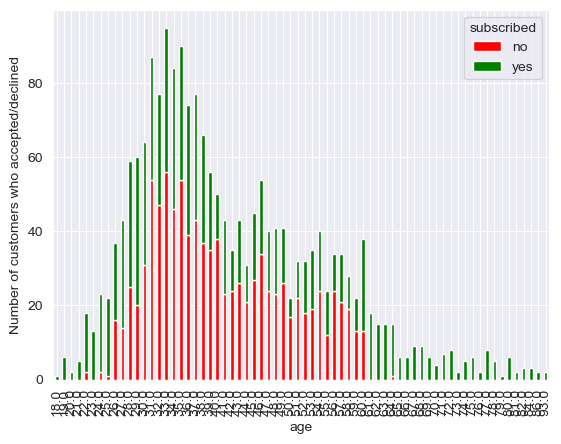

In [51]:
crosstab_CL = pd.crosstab(data_frame['age'], data_frame['subscribed'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Number of customers who accepted/declined')
plt.show()

As predicted, we can see a lot fewer red not subscribed, than those who subscribed in the elder category. We will unstack the chart to see if we can examine something futher.

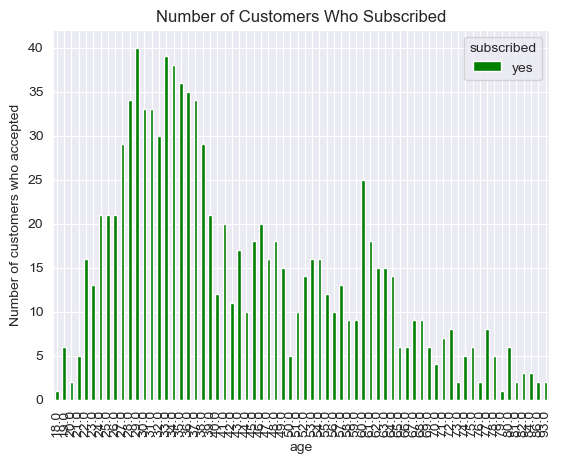

In [52]:
crosstab_CL = pd.crosstab(data_frame['age'], data_frame['subscribed'])
crosstab_CL = crosstab_CL[['yes']]

crosstab_CL.plot(kind='bar', stacked=True, color='green') 
plt.ylabel('Number of customers who accepted')
plt.title('Number of Customers Who Subscribed')
plt.show()

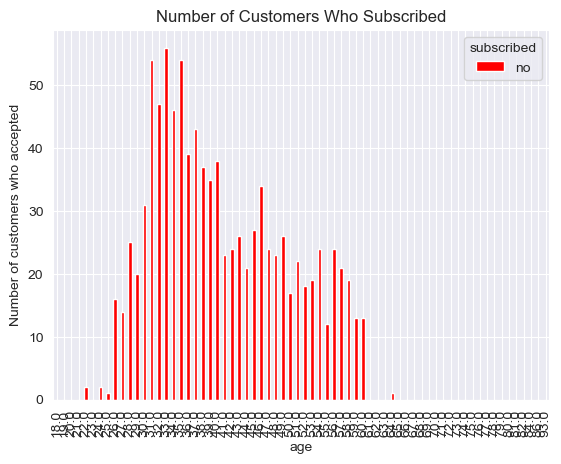

In [54]:
crosstab_CL = pd.crosstab(data_frame['age'], data_frame['subscribed'])
crosstab_CL = crosstab_CL[['no']]

crosstab_CL.plot(kind='bar', stacked=True, color='red') 
plt.ylabel('Number of customers who accepted')
plt.title('Number of Customers Who Subscribed')
plt.show()

Many of the account holders decline within a dense age group of ~26 to ~54. The chart comfirms what appears to be users are less likely to 'decline' the subscription above the age of 61.  

The account holders who 'accept' the subscription is distributed through all ages, but the most dense age range appears to be ~24 and ~40. Potential other cause of this is perhaps the currently employed account holders (ie not yet retired), and the type of job. These areas should be explored.

C:\Users\21308128\AppData\Local\Temp\ipykernel_21240\3270534890.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_LCG = copy_data_frame.pivot_table(values='subscribed',


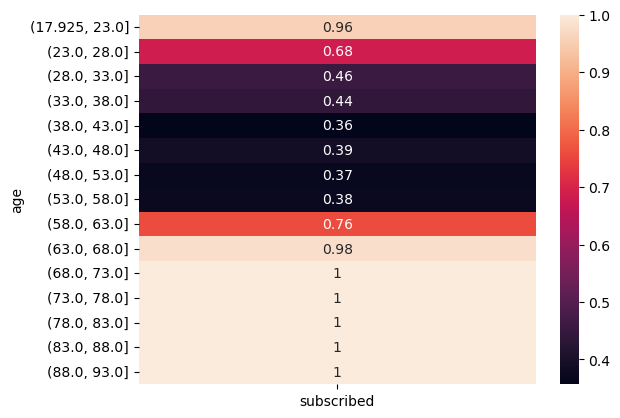

In [15]:
copy_data_frame = data_frame.copy(deep=True)
copy_data_frame['age'] = pd.cut(copy_data_frame['age'], bins=15)

pivot_table_LCG = copy_data_frame.pivot_table(values='subscribed', 
                           index='age',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

In this graph we have binned the users into ages of 5, so 17.925-23 (where 17.925 is exclusive and 23 is inclusive). We can see very young users and senior users (58 and up) are more likely to subscribe.

C:\Users\21308128\AppData\Local\Temp\ipykernel_21240\282554540.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_LCG = copy_data_frame.pivot_table(values='subscribed',


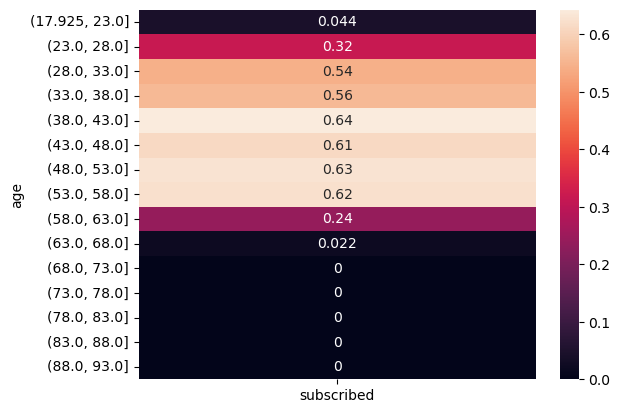

In [16]:
copy_data_frame = data_frame.copy(deep=True)
copy_data_frame['age'] = pd.cut(copy_data_frame['age'], bins=15)

pivot_table_LCG = copy_data_frame.pivot_table(values='subscribed', 
                           index='age',
                           aggfunc=lambda x: x.map({'yes':0, 'no':1}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

Similarly, the inversive of the other graph, we can see a lot of rejection to the subscription is done within 28 to 58. 

# 4 Conclusion

There appears to be a correlation with certain age groups such as between 28 to 58 to be more likely to decline, and above 58+ more likely to subscribe. This conclusion can not be claimed at the moment, without exploring the other attributes as there may be a different confounding variable which has direct causation.  